# visualizing the heatmap of the creation model cloud survey
Tim Tyree<br>
11.16.2024

In [1]:
import sys
import pathlib
import os

from lib.my_initialization import *
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

# define module

In [2]:
1_1

11

# dev

In [3]:
#TODO: figure out reading of one result (please let it be valid!)
#TODO: print it and extract relevant information
#TODO: scale it up and create a single data frame with all the results
#TODO: OR average each pixel before/after doing ^that
#TODO: plot each pixelc

In [4]:
input_folder = f"{nb_dir}/data/osg_output/run_42"
os.path.exists(input_folder)

True

In [5]:
# max_num_trials = 1001197  # 5 min 11 seconds
# max_num_trials = 5*1001197
max_num_trials = 50*1001197
# num_num_trials = 100000 #works for the upper few rows only
num_num_trials = max_num_trials
# index=0
# index=103
trgti='Printing Inputs:'
trgto='Printing Outputs:'
dicts_lst = []
for index in range(num_num_trials):
    # fn = f"job.log.15552477.1001197"
    # fn = f"job.out.15552477.1001197"
    fn = f"job.out.15552477.{index}"
    # fn = f"job.log.15552477.{index}"
    directory = os.path.join(input_folder,fn)
    if os.path.exists(directory):
        with open(directory) as f:
            lines = np.array(f.readlines())
        #find io in file
        if len(lines)>2:
            ii = -9999
            io = -9999
            for i,line in enumerate(lines):
    #             print(line)
                if line.find(trgti) != -1:
                    ii=i
                if line.find(trgto) != -1:
                    io=i
            #extract
            sdict = 'dict('+''.join([x.replace('\n',',') for x in lines[ii+1:io-1]])
            sdict+=lines[io+1].replace('\n',',')
            sdict+=')'
            dicts = eval(sdict)
            #record
            dicts_lst.append(dicts)
len(dicts_lst)
df = pd.DataFrame(dicts_lst); del dicts_lst
df.shape

(721115, 16)

In [6]:
# for i,line in enumerate(lines):
#     print(line)

In [7]:
# path = input_folder
# pl = pathlib.Path(path).iterdir()
# # oslb = os.listdir(path)
# print(type(pl))
# # print (type(oslb))

# print ('pathlib.iter: %s' % sys.getsizeof(pl))
# # print ('os.listdir: %s' % sys.getsizeof(oslb))

In [8]:
a_fk = 1.552
b_fk = 3.01

In [9]:
df['a'] = df['varkappa'].round(3)
df['b'] = (df['a']*(df['chi']-1)).round(3)
#Q: is ^this right??
#A: yes.

In [10]:
a_values = df['a'].round(3).drop_duplicates().sort_values().values
b_values = df['b'].round(3).drop_duplicates().sort_values().values
DA = np.median(np.diff(a_values))
DB = np.median(np.diff(b_values))
DA,DB
a_values,b_values

(array([ 1.   ,  1.1  ,  1.2  ,  1.3  ,  1.4  ,  1.5  ,  1.552,  1.6  ,
         1.7  ,  1.8  ,  1.9  ,  2.   ,  2.1  ,  2.2  ,  2.3  ,  2.4  ,
         2.5  ,  2.6  ,  2.7  ,  2.8  ,  2.9  ,  3.   ,  3.1  ,  3.2  ,
         3.3  ,  3.4  ,  3.5  ,  3.6  ,  3.7  ,  3.8  ,  3.9  ,  4.   ,
         4.1  ,  4.2  ,  4.3  ,  4.4  ,  4.5  ,  4.6  ,  4.7  ,  4.8  ,
         4.9  ,  5.   ,  5.1  ,  5.2  ,  5.3  ,  5.4  ,  5.5  ,  5.6  ,
         5.7  ,  5.8  ,  5.9  ,  6.   ,  6.1  ,  6.2  ,  6.3  ,  6.4  ,
         6.5  ,  6.6  ,  6.7  ,  6.8  ,  6.9  ,  7.   ,  7.1  ,  7.2  ,
         7.3  ,  7.4  ,  7.5  ,  7.6  ,  7.7  ,  7.8  ,  7.9  ,  8.   ,
         8.1  ,  8.2  ,  8.3  ,  8.4  ,  8.5  ,  8.6  ,  8.7  ,  8.8  ,
         8.9  ,  9.   ,  9.1  ,  9.2  ,  9.3  ,  9.4  ,  9.5  ,  9.6  ,
         9.7  ,  9.8  ,  9.9  , 10.   ]),
 array([ 6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
         7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
         8.7,  8.8

In [11]:
df_mean = df.groupby(by=['a','b'])['TermTime'].mean()

In [12]:
df_descr = df.groupby(by=['a','b'])['TermTime'].describe()

In [13]:
# np.array(df_descr.index.values)
a_values = df_descr.reset_index()['a'].drop_duplicates().values
b_values = df_descr.reset_index()['b'].drop_duplicates().values

In [14]:
x, y = np.mgrid[slice(1,10.05,0.1),
                slice(1,15.05,0.1)]
# y, x = np.mgrid[slice(-4, 4 + dy, dy),
#                 slice(-4, 4 + dx, dx)]
# z = (1 - x / 3. + x ** 6 + y ** 3) * np.exp(-x ** 2 - y ** 2)
z = x*y
# z = z[:-1, :-1]
z*=0
z-=9999.
# x[0].shape,y[:,0].shape
d = df_descr['mean']
# atol = 1e2
atol=1e-5
# atol = 13.5
# tol = 1e2
# for i,a in enumerate(x[0]):
#     ia = np.argwhere(np.isclose(a_values,a,atol=atol))    
# #     ia = np.argwhere(np.isclose(a_values,a,rtol=tol))    
#     for j,b in enumerate(y[:,0]):
for i,a in enumerate(x[:,0]):
    ia = np.argwhere(np.isclose(a_values,a,atol=atol))    
    for j,b in enumerate(y[0]):
# for i,a in enumerate(x[0]):
#     for j,b in enumerate(y[:,0]):
        ib = np.argwhere(np.isclose(b_values,b,atol=atol))
#         ib = np.argwhere(np.isclose(b_values,b,rtol=tol))
        try:
            if (ia.shape[0]>0) and (ib.shape[0]>0):
                val = d.loc[a_values[ia[0,0]],b_values[ib[0,0]]]
                z[i-1,j-1] = val
#                 print(f"index found! at {i=},{j=}")
        except KeyError as e:
#             print(f"asdf")
            pass
# for (a,b),row in df_descr.iterrows():
#     val = row['mean']
#     #record
#     z_lst.append(val)
#     a_set.update(set([a]))
# # df_mean
# nrows = len(a_set)

In [15]:
# # val
# # d.loc[ia[0],ib[0]]
# # ia[0],ib[0]
# # val
# # d
# ia = np.argwhere(np.isclose(a_values,a,atol=1e-5))    
# ia,ib,a,b

In [16]:
b_values
# # d.loc[a].loc[b]
# b
# a
# a,b
np.isclose(b_values,b,atol=atol)
np.argwhere(np.isclose(b_values,b,atol=atol))

array([[85]])

In [17]:
# z = np.array(z_lst).reshape(-1,nrows)
# z.shape

In [18]:
b_values

array([ 6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,
        7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. ])

In [19]:
# df['a']*(df['chi'] - 1)

In [20]:
# dx, dy = 0.015, 0.05
# xcol = 'a'
# ycol = 'b'
# # a_values = np.arange(1,10.05,0.1)
# # b_values = np.arange(1,15.05,0.1)
# # x, y = np.mgrid[iter(sorted(a_values)),
# #                 iter(sorted(b_values))]
# x, y = np.mgrid[slice(1,10.05,0.1),
#                 slice(1,15.05,0.1)]
# # y, x = np.mgrid[slice(-4, 4 + dy, dy),
# #                 slice(-4, 4 + dx, dx)]
# z = (1 - x / 3. + x ** 6 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# z = z[:-1, :-1]
# z*=0
# z-=9999.
# ncols,nrows = x.shape
# ncols,nrows,z.shape

# zcol='TermTime'
# # n_digits_round=7
# n_digits_round=15
# # atol = 1e-08
# # atol = 1e-04
# # atol = 1e-2
# # atol = 1e-1#different but smaller
# atol = 1e-0 #different
# # atol=1e1
# min_num_obs = 1
# boona = ~np.isnan(df[zcol].values)
# for i in range(ncols-1):
#     for j in range(nrows-1):
#         pass
#         #compute the mean of the four corners
# #         boo = np.isclose(df[xcol],x[i,j],atol=n_digits_round) & np.isclose(df[ycol],y[i,j],atol=n_digits_round) & boona
# #         boo = np.isclose(df[xcol],x[i,j],atol=atol) & np.isclose(df[ycol],y[i,j],atol=atol) & boona
#         boo = np.isclose(df[xcol],x[i,j]) & np.isclose(df[ycol],y[i,j]) & boona
#         if sum(boo)>=min_num_obs:
#             zvalue = df[boo][zcol].mean()
#             #TODO: record to z[i,j] the mean of the means
#             z[i,j] = zvalue # i*j

In [21]:
# beep(3)

In [22]:
# assert sum(boona)/boona.shape[0]==1
# #^that says there is no nan value

In [23]:
# tol=1e-1
# (np.isclose(df[xcol],x[i,j],rtol=tol) & np.isclose(df[ycol],y[i,j],rtol=tol)).sum(),boona.shape

In [24]:
# beep(3)

In [25]:
# df[zcol].describe()

In [26]:
# df[zcol].mean()

In [27]:
# # df[boo][zcol].hist()
# df[boo][zcol].shape

In [28]:
# np.isclose?

In [29]:
# z

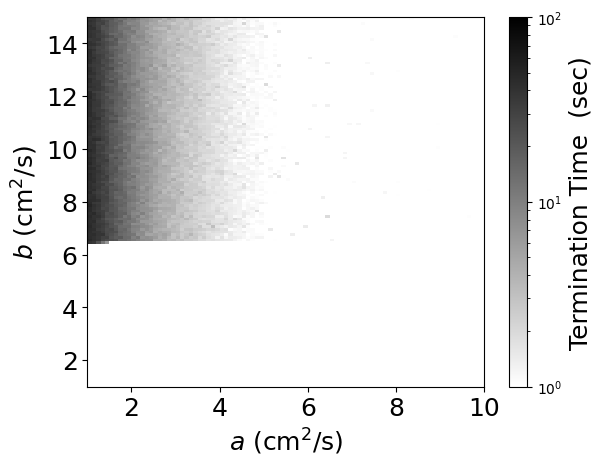

In [30]:
fontsize=18
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()
# z_min, z_max = 1e-9, z.max()
# z_min, z_max = 1e-3, z.max()
# z_min, z_max = 1e-1, z.max()
# z_min, z_max = 1e-1, 100
z_min, z_max = 1, 100
# z_min, z_max = 1e1, z.max()
# z_min, z_max = 1e-9, 1e-5
c = plt.pcolormesh(x, y, z, cmap ='gray_r', vmin = z_min, vmax = z_max, norm=LogNorm())#, cmap='viridis')
cbar = plt.colorbar(c)
cbar.set_label('Termination Time  (sec)',fontsize=fontsize)
format_plot(xlabel=r'$a$ (cm$^2/$s)', ylabel=r'$b$ (cm$^2/$s)',fontsize=fontsize)
# plt.ylim([7.8,15])
# plt.title('matplotlib.pyplot.pcolormesh() function Example', fontweight ="bold")
plt.show()

In [1]:
# type(cbar)
# # ,fontsize=fontsize

In [32]:
# a_values = np.arange(1,10.05,0.1)
# b_values = np.arange(1,15.05,0.1)
# xx, yy = np.meshgrid(a_values, b_values, sparse=True)
# z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

In [33]:
# plt.imshow(z)

In [34]:
# for (a,b),ts in df[['a','b','TermTime']].groupby(by=['a','b']):
#     pass

In [35]:
# tsv = ts['TermTime'].values
# plt.hist(tsv,bins=np.arange(0,1,0.05))
# plt.show()

In [36]:
# a,b

In [37]:
#heretim (bonus mode)
#DONE: condense table to minimal a,b,TermTime table
#DONE(trivially): generate spline estimate of mean value of surface in given (a,b) space
#DONEDONE: visualize ibid
#TODO: polish it, and scale it up as much as possible
#TODO: put it in a nice LaTeX document and share it with wouter via Overleaf

In [38]:
beep(3)

-n 
-n 
-n 


0

In [39]:
# fn_lst = os.listdir(input_folder)
# len(fn_lst)

In [40]:
# for fn in os.listdir(input_folder):
#     pass

In [41]:
# fn